# Text difficulty prediction

Using WCPM, accuracy, comprehension

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('table_for_prediction.csv')

In [3]:
df['Acc4'] = df.Acc.apply(lambda x: x ** 4)

In [4]:
df.columns

Index(['Session', 'Form', 'Grade', 'WCPM', 'Acc', 'Comp', 'Exp', 'level',
       'WCPM_zscore', 'Acc_zscore', 'WCPM_zscore_by_grade',
       'Acc_zscore_by_grade', 'gyorB', 'gyorC', 'gyorE', 'gyorF', 'gyorG',
       'gyorH', 'gyorJ', 'gyorK', 'gyorL', 'gyorM', 'gyorN', 'gyorO', 'gyorP',
       'gyorQ', 'mlevel_numeric', 'form_numeric', 'mlevel_form_diff',
       'text_is_above_level', 'Acc4'],
      dtype='object')

"Spread out" accuracy

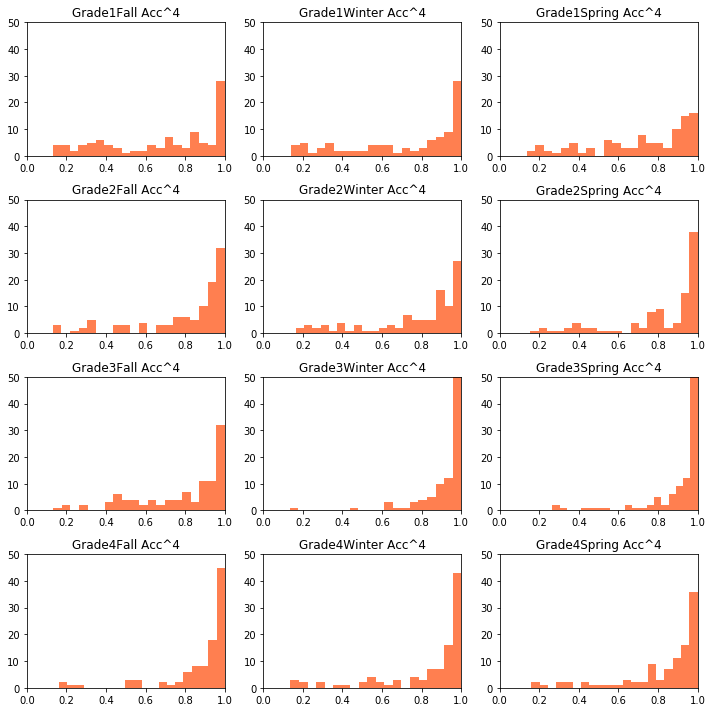

In [5]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        accs = np.array(df.loc[df.Form == form].Acc4)
        
        ax[grade_idx][term_idx].hist(accs, bins=20, color='coral')
        ax[grade_idx][term_idx].set_title(form + ' Acc^4')
        ax[grade_idx][term_idx].set_xlim(0, 1)
        ax[grade_idx][term_idx].set_ylim(0, 50)
plt.tight_layout()
#     break

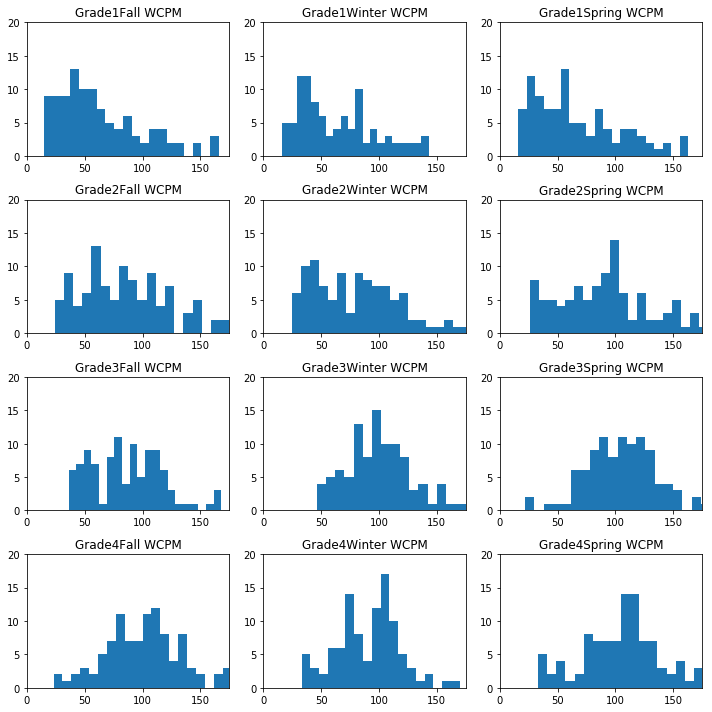

In [6]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        wcpm = np.array(df.loc[df.Form == form].WCPM)
        
        ax[grade_idx][term_idx].hist(wcpm, bins=20)
        ax[grade_idx][term_idx].set_title(form + ' WCPM')
        ax[grade_idx][term_idx].set_xlim(0, 175)
        ax[grade_idx][term_idx].set_ylim(0, 20)
plt.tight_layout()
#     break

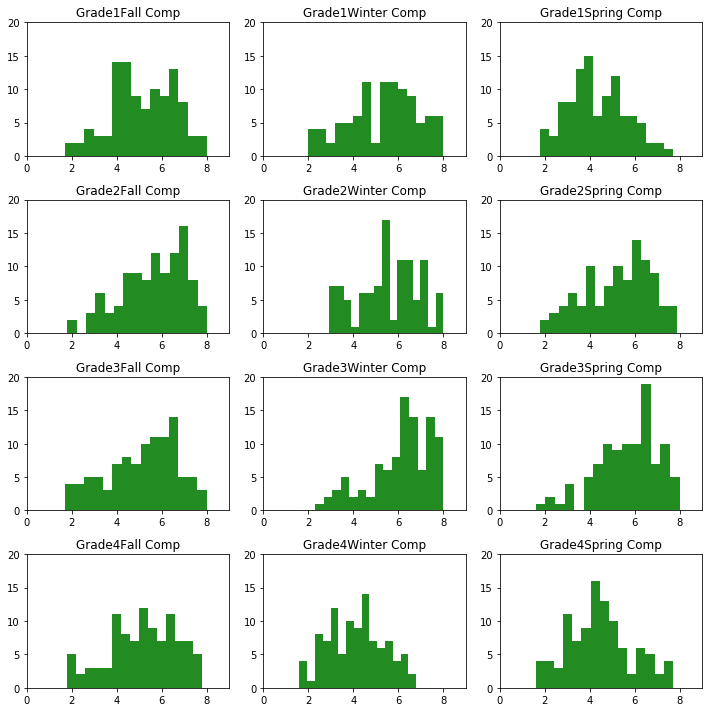

In [7]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        comp = np.array(df.loc[df.Form == form].Comp)
        
        ax[grade_idx][term_idx].hist(comp, bins=15, color='forestgreen')
        ax[grade_idx][term_idx].set_title(form + ' Comp')
        ax[grade_idx][term_idx].set_xlim(0, 9)
        ax[grade_idx][term_idx].set_ylim(0, 20)
plt.tight_layout()
#     break

In [8]:
def plot_two_features_all_sessions(feature_1, feature_2):
    plt.figure(figsize=(8, 8))
    for gyor_numeric_value, gyor_color, gyor_marker in zip(
        [3, 2, 1, 0], 
        ['lightgreen', 'gold', 'darkorange', 'red'], 
        ['+', 's', 'v', 'x']):
        df_selected = df.loc[df.gyorJ == gyor_numeric_value]
        feature_1_column = df_selected[feature_1]
        feature_2_column = df_selected[feature_2]
        plt.title(feature_1 + ', ' + feature_2 + ', all sessions')
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        plt.scatter(
            feature_1_column,
            feature_2_column,
            color=gyor_color,
            marker=gyor_marker,
            alpha=.5,
            label=gyor_numeric_value
        )
        print(gyor_numeric_value, len(feature_1_column))
    print('n =', df.shape[0])
    plt.legend()

3 768
2 191
1 98
0 158
n = 1215


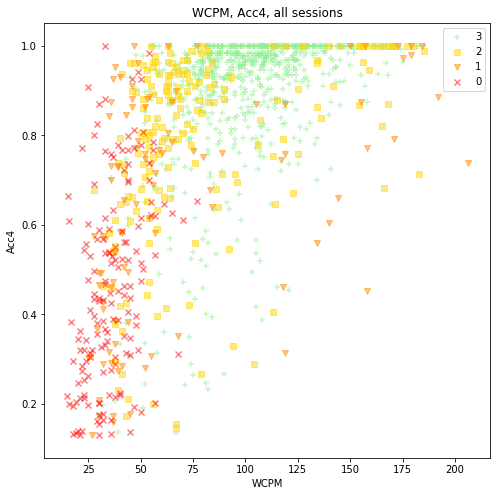

In [9]:
plot_two_features_all_sessions('WCPM', 'Acc4')

3 768
2 191
1 98
0 158
n = 1215


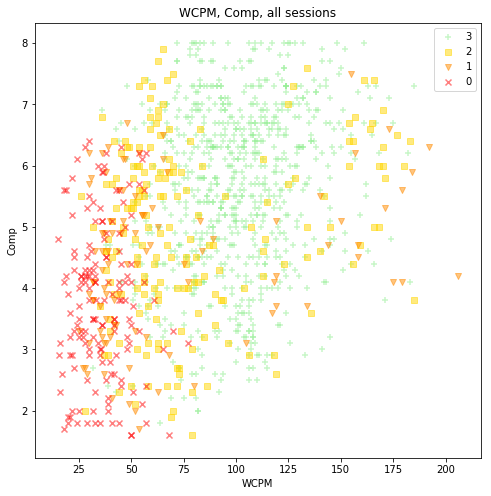

In [10]:
plot_two_features_all_sessions('WCPM', 'Comp')

3 768
2 191
1 98
0 158
n = 1215


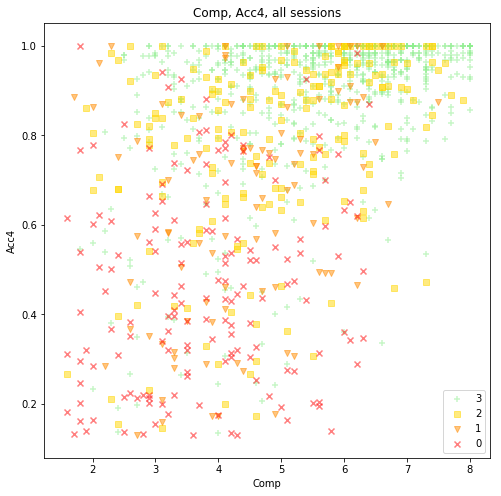

In [11]:
plot_two_features_all_sessions('Comp', 'Acc4')

In [12]:
def plot_two_features_by_grade(feature_1, feature_2):
    fig, ax = plt.subplots(1, 4)
    fig.set_figwidth(20)
    for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
#         plt.figure(figsize=(8, 8))
        for gyor_numeric_value, gyor_color, gyor_marker in zip(
        [3, 2, 1, 0], 
        ['lightgreen', 'gold', 'darkorange', 'red'], 
        ['+', 's', 'v', 'x']):
            df_selected = df.loc[df.Grade == grade]
            if gyor_numeric_value == 3:
                print(df_selected.shape[0])
            df_selected = df_selected.loc[df_selected.gyorJ == gyor_numeric_value]
            print(grade, gyor_numeric_value, df_selected.shape[0])
            feature_1_column = df_selected[feature_1]
            feature_2_column = df_selected[feature_2]
            ax[grade_idx].set_title(feature_1 + ', ' + feature_2 + ', ' + grade)
            ax[grade_idx].set_xlabel(feature_1)
            ax[grade_idx].set_ylabel(feature_2)
            ax[grade_idx].scatter(
                feature_1_column,
                feature_2_column,
                color=gyor_color,
                marker=gyor_marker,
                alpha=.5,
                label=gyor_numeric_value
            )
    plt.legend()
    plt.show()

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


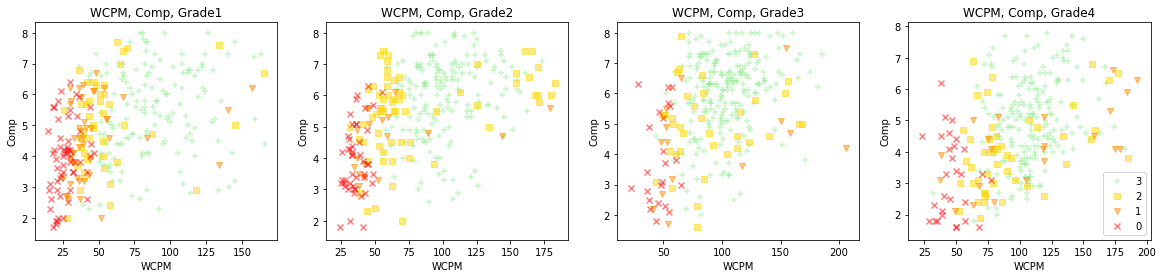

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


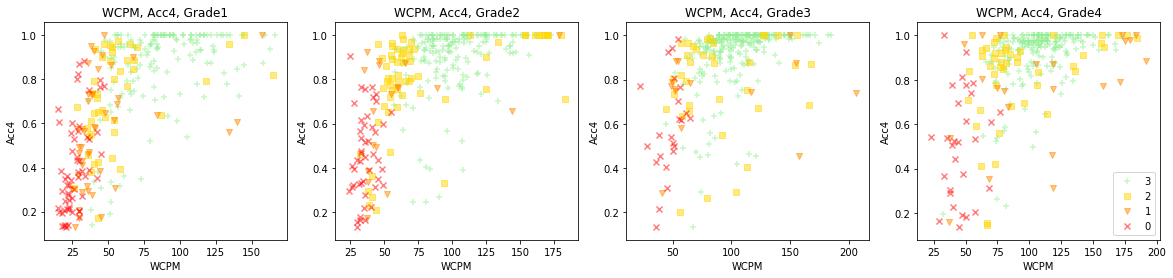

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


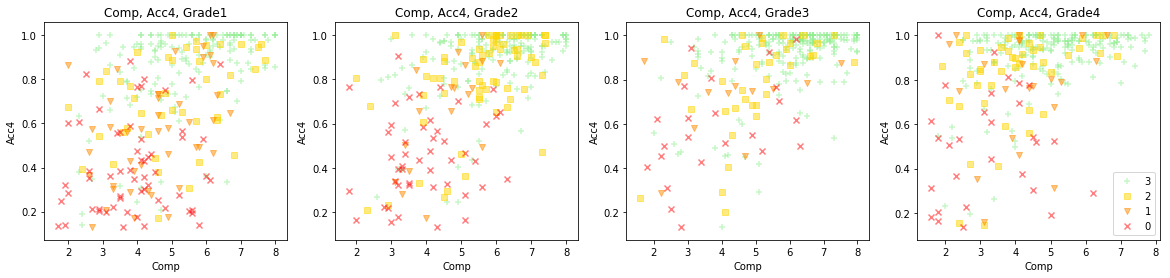

In [13]:
plot_two_features_by_grade('WCPM', 'Comp')
plot_two_features_by_grade('WCPM', 'Acc4')
plot_two_features_by_grade('Comp', 'Acc4')